In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [30]:
featureName = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'target', 'thal']
df = pd.read_csv('data/heart+disease/processed_cleveland.csv', header=None, names=featureName, index_col=False, delimiter=',')
df.head()

/tmp/ipykernel_39464/56072688.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('data/heart+disease/processed_cleveland.csv', header=None, names=featureName, index_col=False, delimiter=',')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [31]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,thal
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0


In [32]:
df.shape

(303, 13)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  ca        303 non-null    float64
 11  target    303 non-null    object 
 12  thal      303 non-null    object 
dtypes: float64(11), object(2)
memory usage: 30.9+ KB


In [34]:
df.replace('?', np.nan, inplace=True)

In [35]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
ca          0
target      4
thal        2
dtype: int64

In [36]:
df.dropna(inplace=True)

In [37]:
df.duplicated().sum()

0

In [38]:
print(df['target'].unique())
print(df['thal'].unique())

['0.0' '3.0' '2.0' '1.0']
['6.0' '3.0' '7.0']


In [39]:
df['thal'].replace(['6.0', '3.0', '7.0'], [6, 3, 7], inplace=True)
df['target'].replace(['0.0', '3.0', '2.0', '1.0'], [0, 3, 2, 1], inplace=True)

In [40]:
indicators = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal', 'target']]

Text(0.5, 1.0, 'Correlation Heatmap without Categorical Variables')

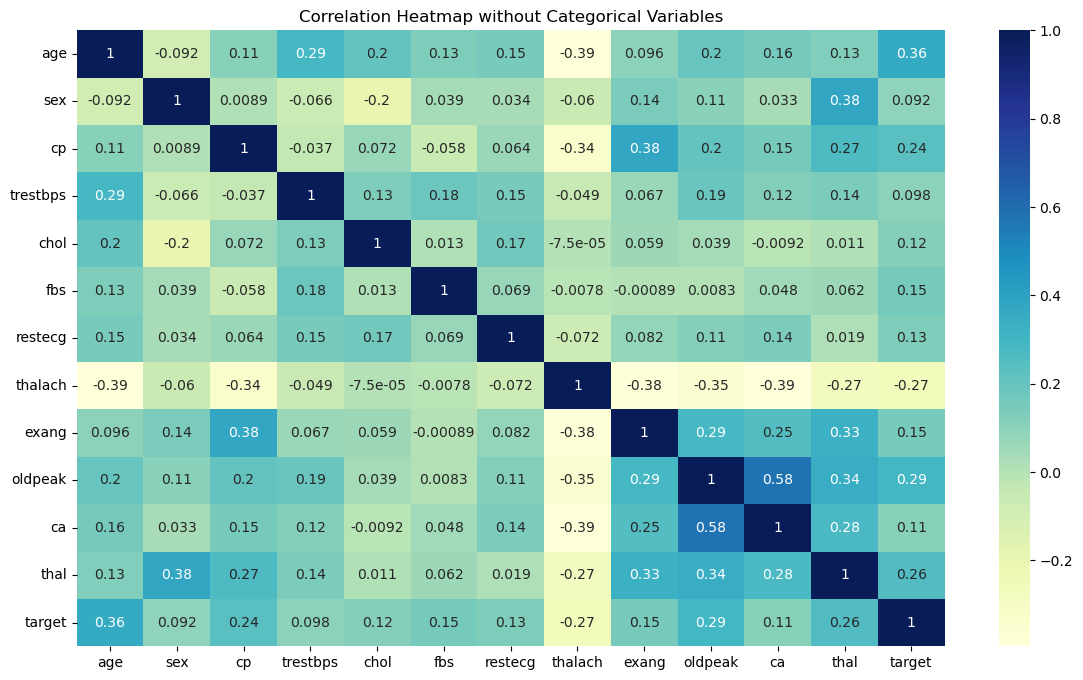

In [41]:
plt.figure(figsize=(14, 8))
sns.heatmap(indicators.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap without Categorical Variables')

In [42]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'ca', 'target', 'thal'],
      dtype='object')

In [43]:
# df['Wild 1SW weight (t)'] = df['Wild 1SW weight (t)'].astype('int64')
# df['Wild MSW weight (t)'] = df['Wild MSW weight (t)'].astype('int64')
# df['Sea trout weight (t)'] = df['Sea trout weight (t)'].astype('int64')
# df['Finnock weight (t)'] = df['Finnock weight (t)'].astype('int64')
X = df[['exang', 'ca']]
X

,exang,ca
0,0.0,3.0
1,1.0,2.0
2,1.0,2.0
3,0.0,3.0
4,0.0,1.0
...,...,...
297,1.0,2.0
298,0.0,2.0
299,0.0,2.0
300,1.0,2.0


In [44]:
# df['Wild fish (t)'] = df['Wild fish (t)'].astype('int64')
y = df['target']
# pd.cut(y, bins = 289, labels=np.arange(289), right=False)
# y = np.digitize(y, np.arrange())

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [46]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [47]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [48]:
model.score(X_test, y_test)

0.65

In [49]:
y_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)
print("Classification report for - \n{}:\n{}\n".format(model, classification_report(y_test, y_pred)))

Classification report for - 
SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        39
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4

    accuracy                           0.65        60
   macro avg       0.16      0.25      0.20        60
weighted avg       0.42      0.65      0.51        60




/home/rendika/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rendika/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rendika/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
mse = mean_squared_error(y_test, y_pred)
mse

1.2833333333333334

In [52]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.6166666666666667